In [10]:
"""Main function for train, eval, and test."""

from __future__ import print_function
from __future__ import absolute_import

import numpy as np
import tensorflow as tf

from linear_mrf import LinearMRF
from data_tools import load_dataset, plot_image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')
flags.DEFINE_integer('num_epochs', 10, 'Number of update steps to run.')
flags.DEFINE_float('convergence_margin', 0.01,
                   'Margin of convergence for inference')
flags.DEFINE_string('input_file_path', 'data/circle.png', 'Original Image.')
'''



"\nflags = tf.app.flags\nFLAGS = flags.FLAGS\nflags.DEFINE_float('learning_rate', 0.01, 'Initial learning rate.')\nflags.DEFINE_integer('num_epochs', 10, 'Number of update steps to run.')\nflags.DEFINE_float('convergence_margin', 0.01,\n                   'Margin of convergence for inference')\nflags.DEFINE_string('input_file_path', 'data/circle.png', 'Original Image.')\n"

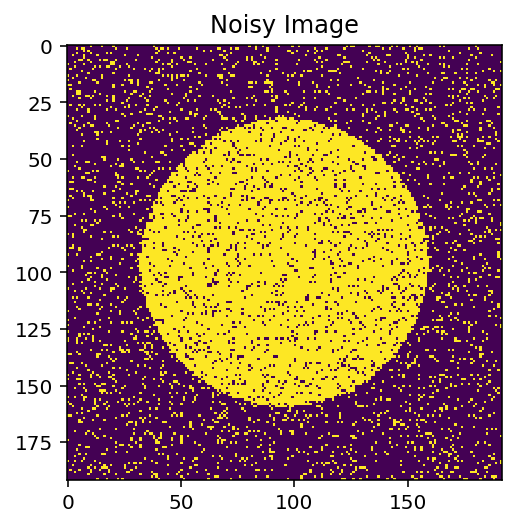

In [11]:
#def main(_):
"""High level pipeline.
    This script performs the trainsing, evaling and testing state of the model.
"""
#     learning_rate = FLAGS.learning_rate
#     num_epochs = FLAGS.num_epochs
#     convergence_margin = FLAGS.convergence_margin
#     input_file_path = FLAGS.input_file_path
learning_rate = 0.01
num_epochs = 10
convergence_margin = 0.01
input_file_path = 'data/circle.png'
original_img, noisy_samples = load_dataset(input_file_path, 10)
height = original_img.shape[0]
width = original_img.shape[1]

original_img = original_img.flatten()
noisy_samples = [sample.flatten() for sample in noisy_samples]
plot_image(noisy_samples[0].reshape(height, width), 'Noisy Image',\
               'data/noisy_sample.png')


#if __name__ == '__main__':
#    tf.app.run()

[ 1.  0.  0.  0.]
[1 0] [1 0]
EPOCH 1
CURRENT SCORE:  128.2
WEIGHTS: 
1.0
1.0
EPOCH 2
CURRENT SCORE:  236.3
WEIGHTS: 
-6.58
13.32
EPOCH 3
CURRENT SCORE:  127.4
WEIGHTS: 
13.01
15.82
EPOCH 4
CURRENT SCORE:  76.7
WEIGHTS: 
19.09
16.02
EPOCH 5
CURRENT SCORE:  66.3
WEIGHTS: 
18.64
16.08
EPOCH 6
CURRENT SCORE:  64.1
WEIGHTS: 
16.85
16.14
EPOCH 7
CURRENT SCORE:  63.4
WEIGHTS: 
14.78
16.2
EPOCH 8
CURRENT SCORE:  62.8
WEIGHTS: 
12.64
16.26
EPOCH 9
CURRENT SCORE:  62.8
WEIGHTS: 
10.44
16.32
EPOCH 10
CURRENT SCORE:  62.8
WEIGHTS: 
8.24
16.38


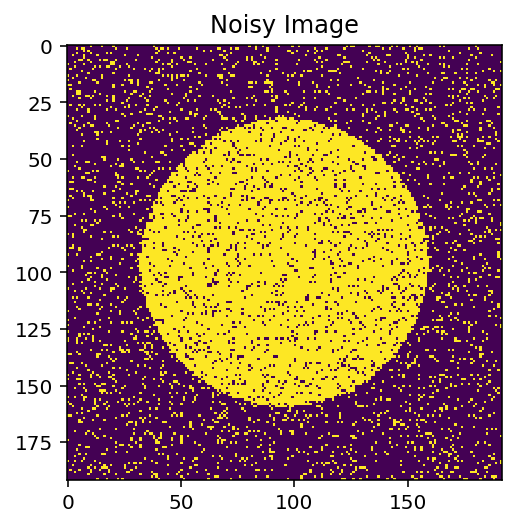

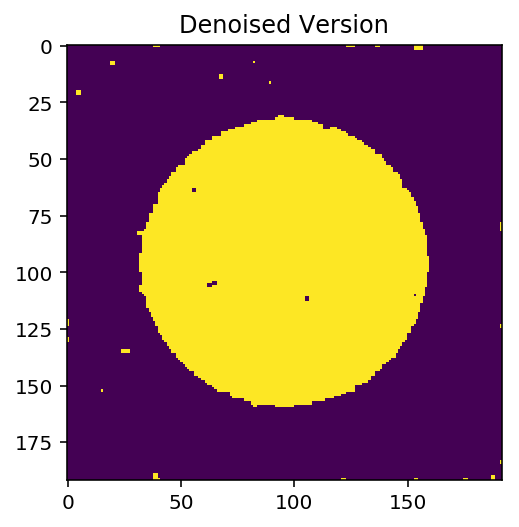

In [12]:
    # Load dataset.


# Initialize model.
model = LinearMRF(width, height)

model.train(original_img, noisy_samples, learning_rate, num_epochs,\
            convergence_margin)

# Evaluate model on training dataset
denoised_images = model.test(noisy_samples, convergence_margin)

    # Plot inference result on image
plot_image(noisy_samples[0].reshape(height, width), 'Noisy Image',\
               'data/noisy_sample.png')
plot_image(denoised_images[0], 'Denoised Version', 'data/denoised_img.png')